In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
leads=pd.read_csv(r"C:\Users\LENOVO\Downloads\ded03f4f-6db1-468b-b4fd-16e5a6763385-Lead-Scoring-Case-Study\Lead Scoring Assignment\Leads.csv")

In [5]:
# Look at the first few entries
pd.set_option('display.max_columns', None)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [9]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
# Checking the info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
# Check the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [15]:
#checking null values in each rows

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
#checking null values in each rows

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [19]:
#dropping cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, axis=1, inplace=True)

In [21]:
# Check missing values percentage again
round(leads.isna().sum()/len(leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [23]:
leads.drop(['City'], axis = 1, inplace = True)
leads.drop(['Country'], axis = 1, inplace = True)

In [25]:
# Get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


In [27]:
#checking value counts of Lead Profile column

leads['Lead Profile'].value_counts(dropna=False)

Lead Profile
Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

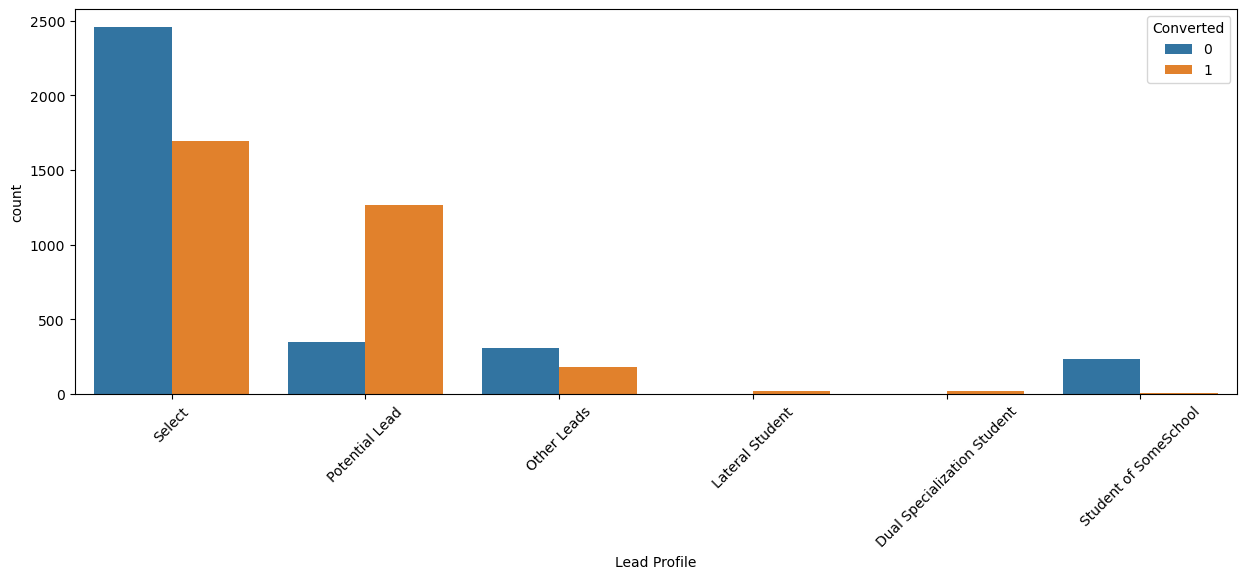

In [29]:
#plotting spread of Lead Profile columnn 

plt.figure(figsize=(15,5))
sns.countplot(data=leads, x='Lead Profile', hue='Converted')
plt.xticks(rotation=45)
plt.show()

In [31]:
#checking value counts of How did you hear about X Education column
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [33]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [35]:
#Checking value counts for remaining columns for further analysis
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [37]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [39]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [41]:
# Check missing values percentage again
round(leads.isna().sum()/len(leads)*100,2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
What is your current occupation           29.11
Tags                                      36.29
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [43]:
# For categorical with high missing (Specialization, Occupation, Tags), impute 'Not Specified'
leads['Specialization'] = leads['Specialization'].fillna('Not Specified')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Not Specified')
leads['Tags'] = leads['Tags'].fillna('Not Specified')

In [45]:

# For low missing (Lead Source, TotalVisits, Page Views Per Visit, Last Activity), drop rows
leads = leads.dropna()


In [47]:
# Verify no missing
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [49]:
# Drop identifiers (Prospect ID, Lead Number)
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [51]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,No,Modified


In [53]:
# Further EDA: Univariate and Bivariate for all
cat_cols = leads.select_dtypes(include='object').columns
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: proportion, dtype: float64


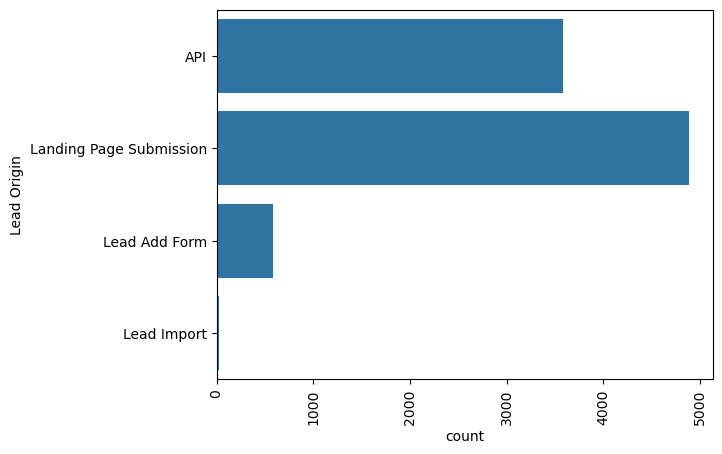

Lead Source
Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
youtubechannel        0.011020
testone               0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
blog                  0.011020
NC_EDM                0.011020
Name: proportion, dtype: float64


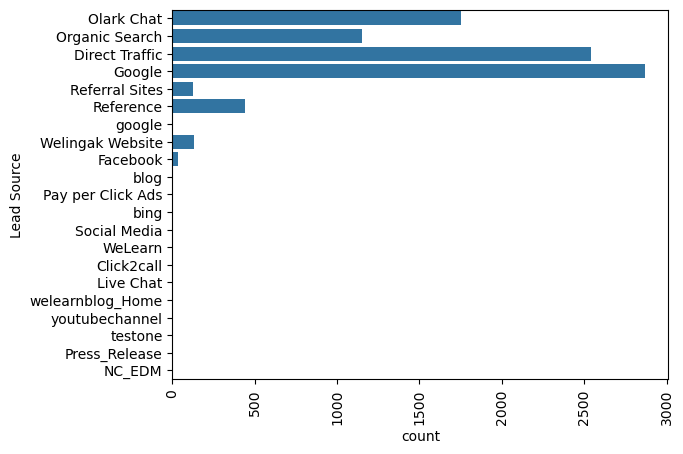

Do Not Email
No     92.109323
Yes     7.890677
Name: proportion, dtype: float64


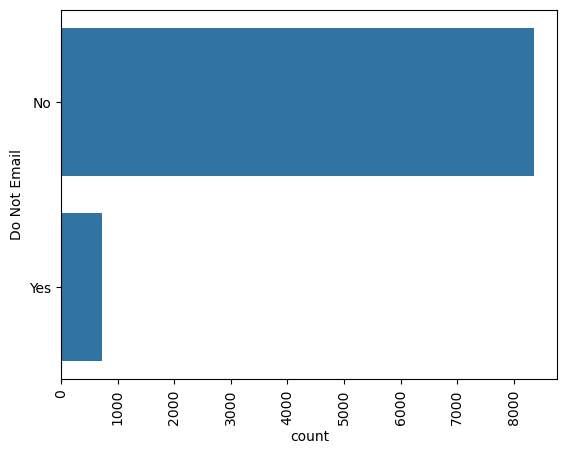

Last Activity
Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: proportion, dtype: float64


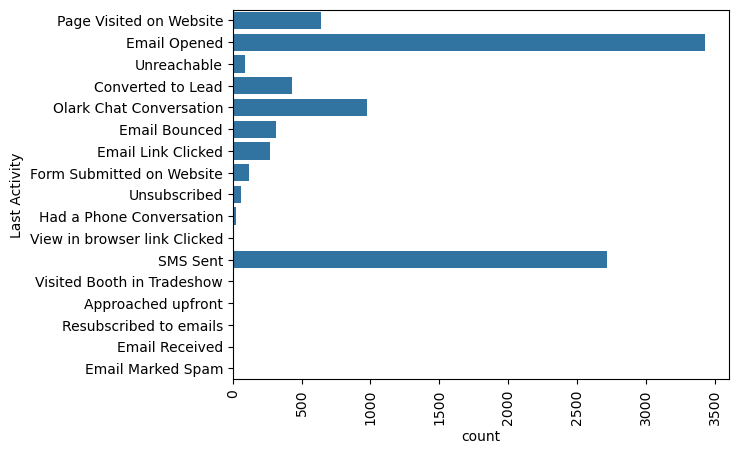

Specialization
Select                               20.398942
Not Specified                        15.770333
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: proportion, dtype: float64


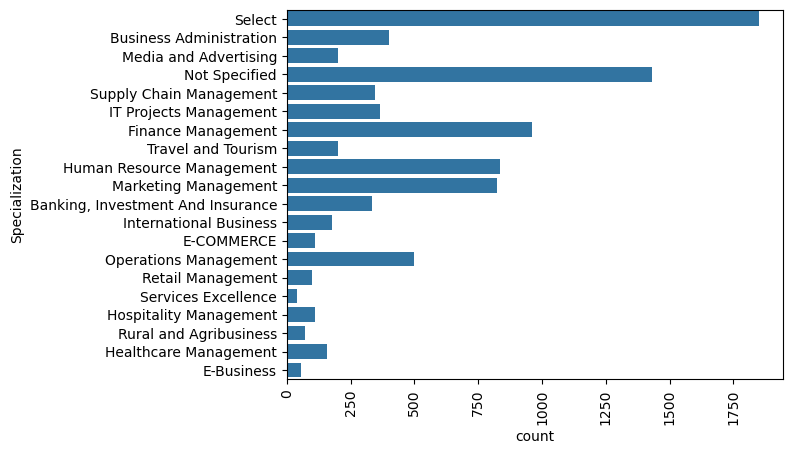

What is your current occupation
Unemployed              60.348248
Not Specified           29.567996
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: proportion, dtype: float64


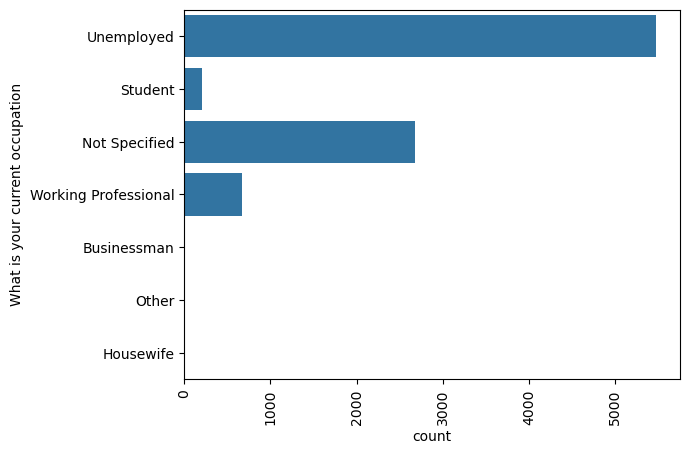

Tags
Not Specified                                        36.665197
Will revert after reading the email                  22.217324
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                        

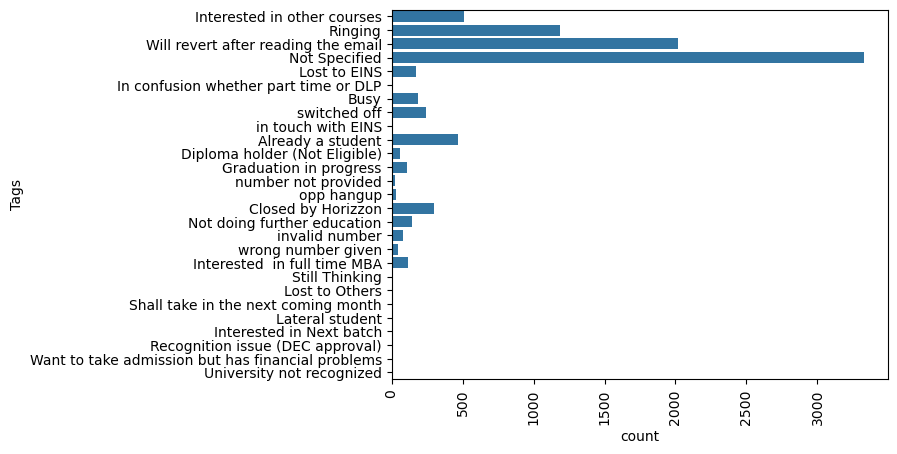

A free copy of Mastering The Interview
No     68.172801
Yes    31.827199
Name: proportion, dtype: float64


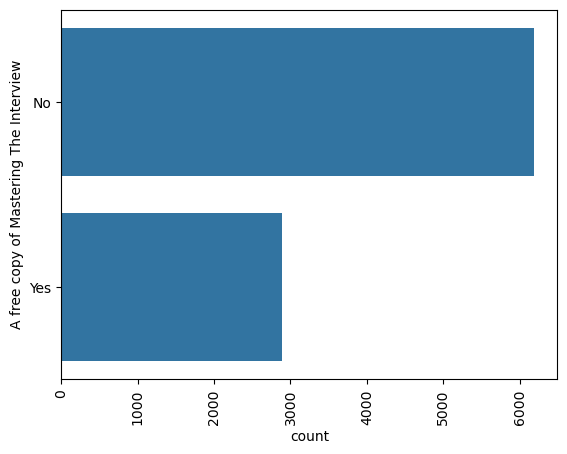

Last Notable Activity
Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Name: proportion, dtype: float64


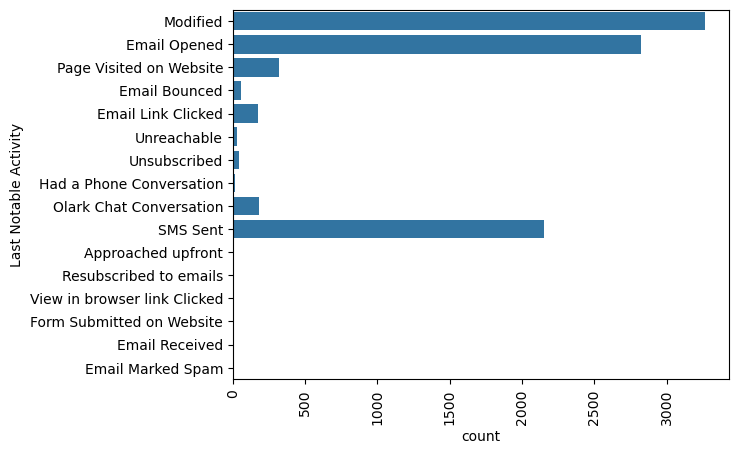

In [55]:
# Univariate Categorical
for col in cat_cols:
    print(leads[col].value_counts(normalize=True) * 100)
    sns.countplot(leads[col])
    plt.xticks(rotation=90)
    plt.show()


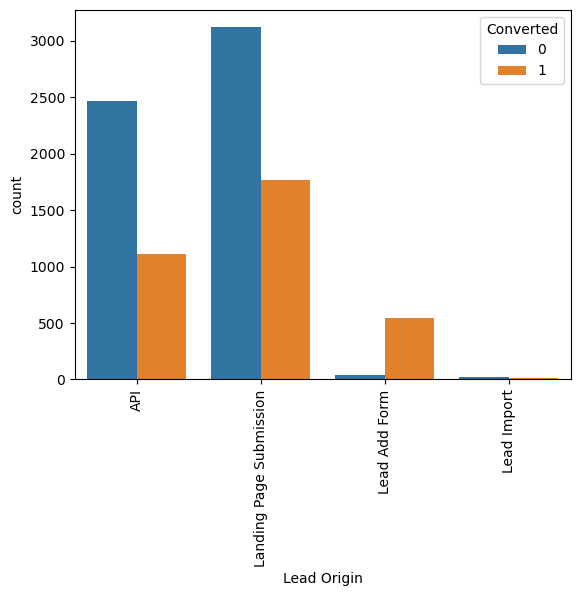

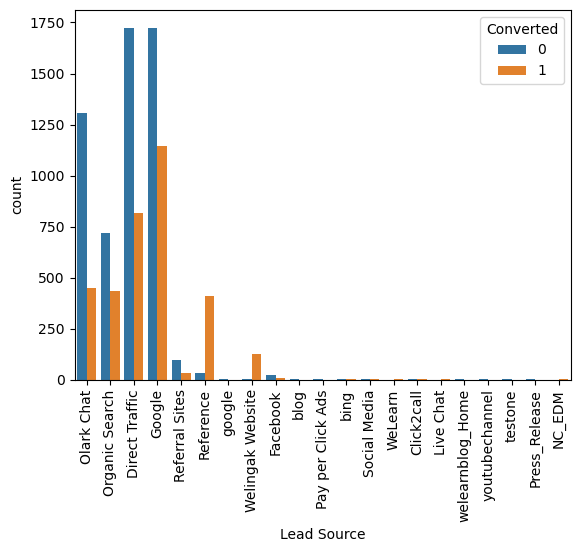

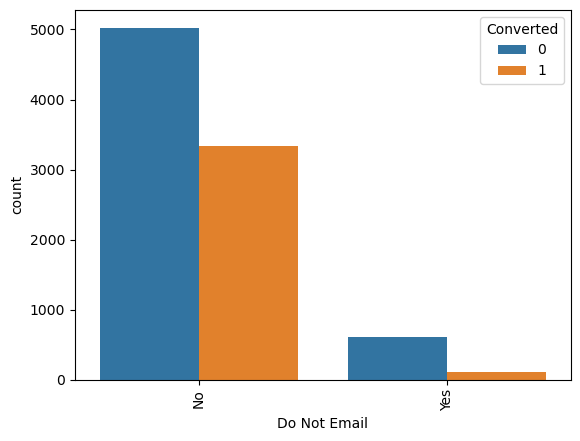

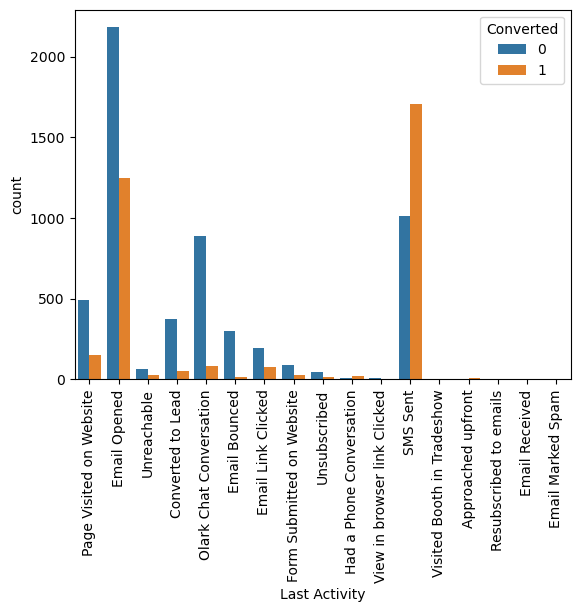

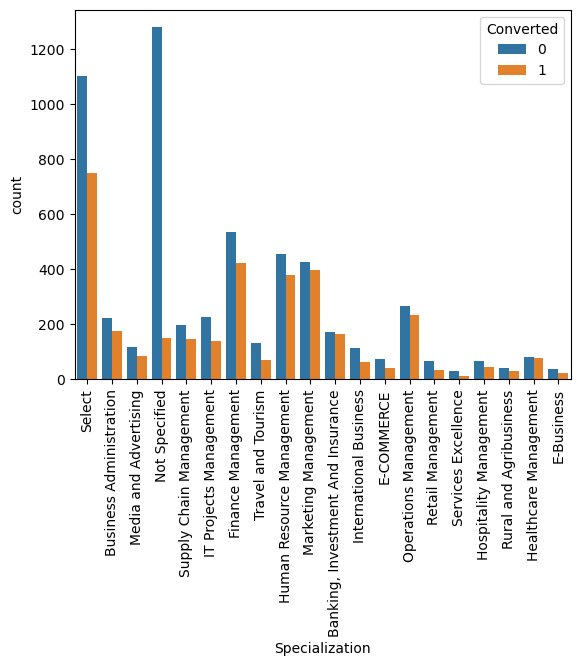

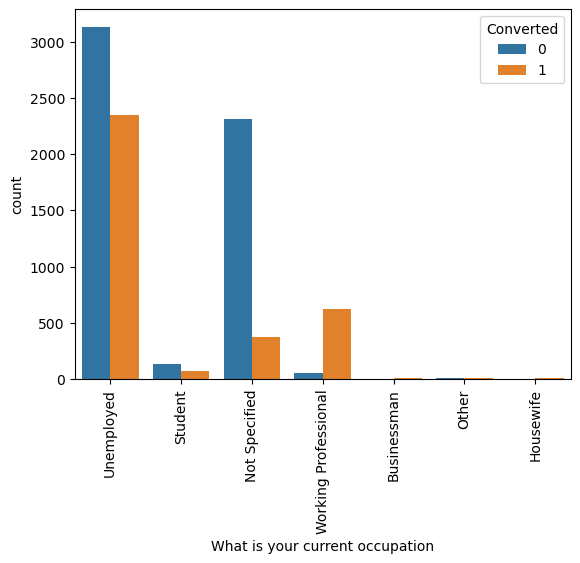

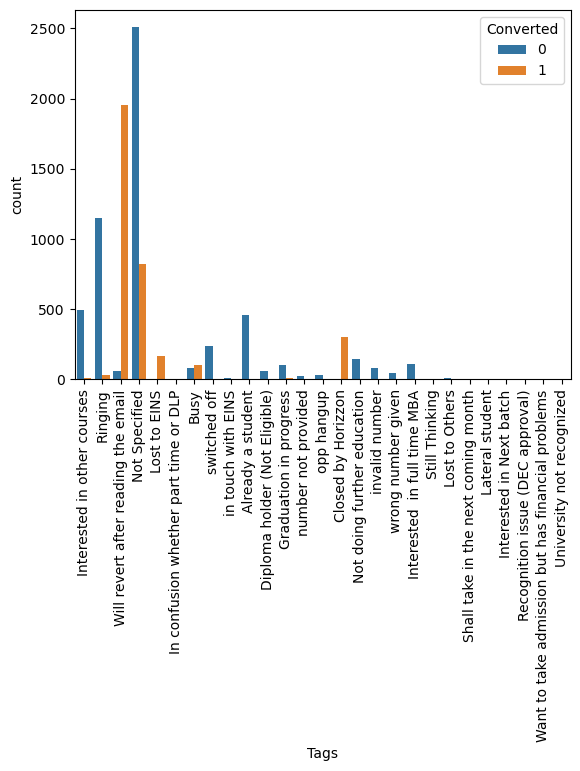

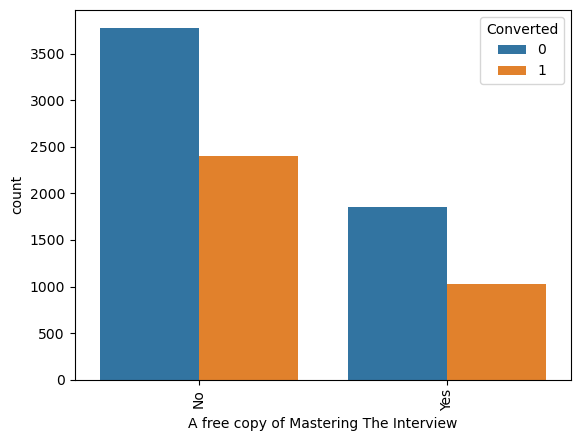

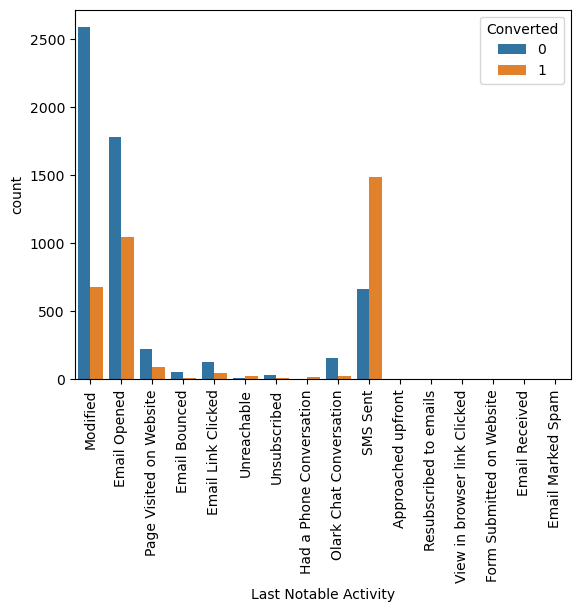

In [57]:
# Bivariate Categorical vs Converted
for col in cat_cols:
    sns.countplot(x=col, hue='Converted', data=leads)
    plt.xticks(rotation=90)
    plt.show()

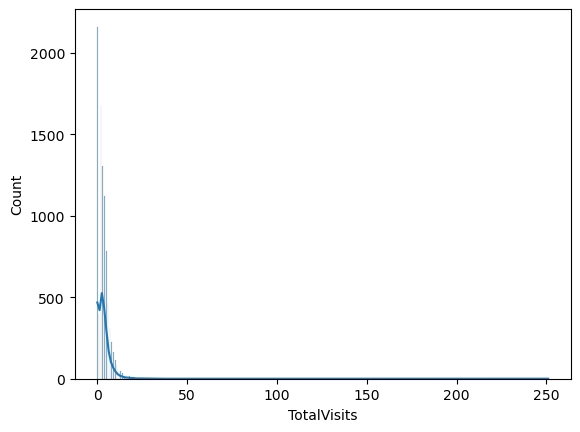

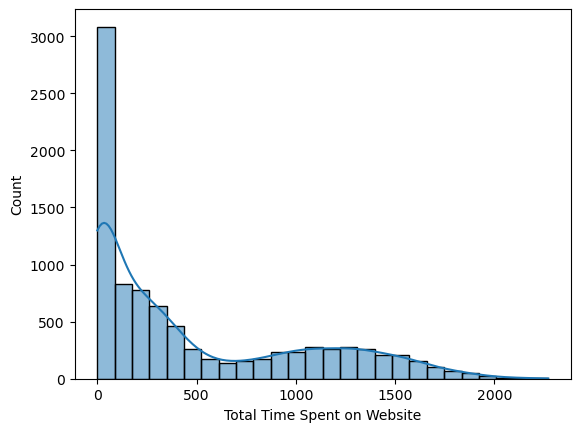

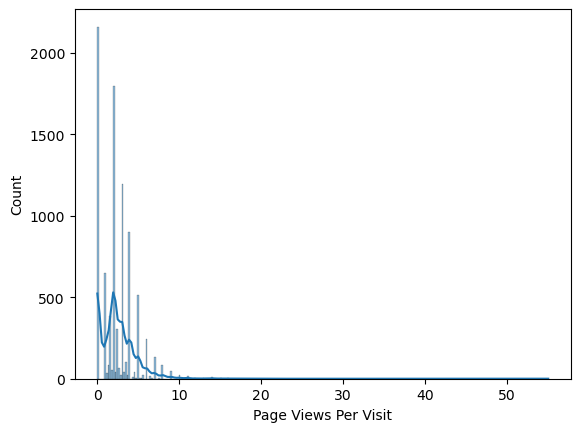

In [59]:
# Univariate Numerical
for col in num_cols:
    sns.histplot(leads[col], kde=True)
    plt.show()

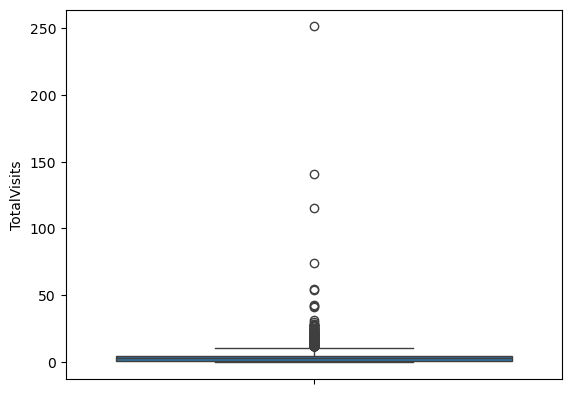

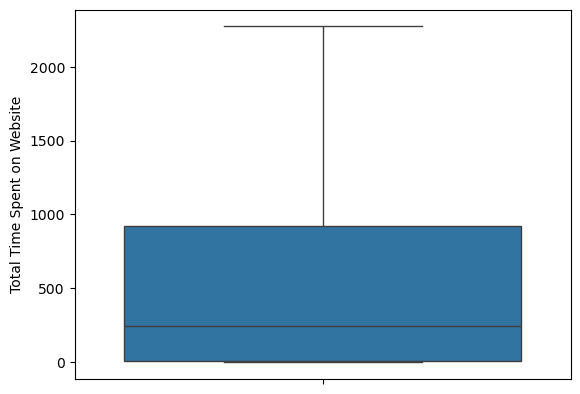

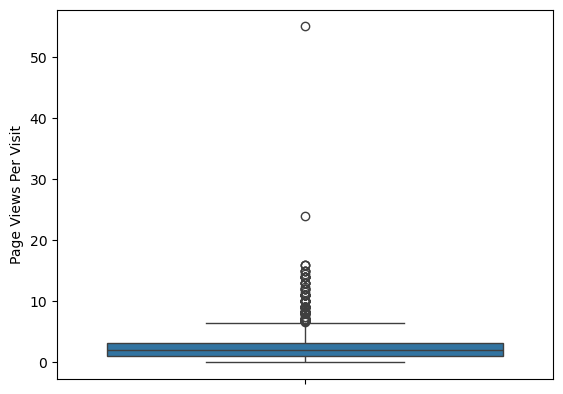

In [61]:
# Outlier handling: Boxplots and cap
for col in num_cols:
    sns.boxplot(leads[col])
    plt.show()

In [63]:
# Cap at 99th percentile
for col in num_cols:
    percentiles = leads[col].quantile(0.99)
    leads[col][leads[col] >= percentiles] = percentiles

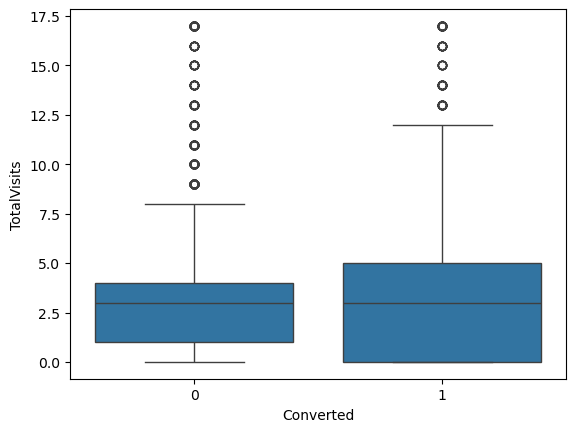

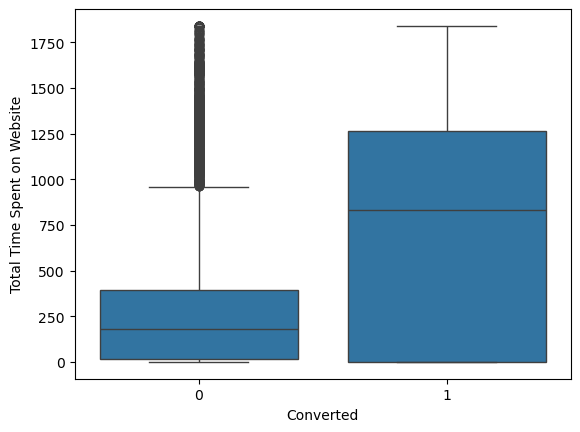

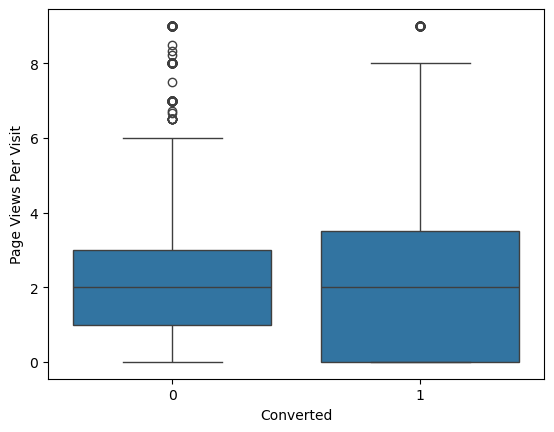

In [65]:
# Bivariate Numerical vs Converted
for col in num_cols:
    sns.boxplot(y=col, x='Converted', data=leads)
    plt.show()

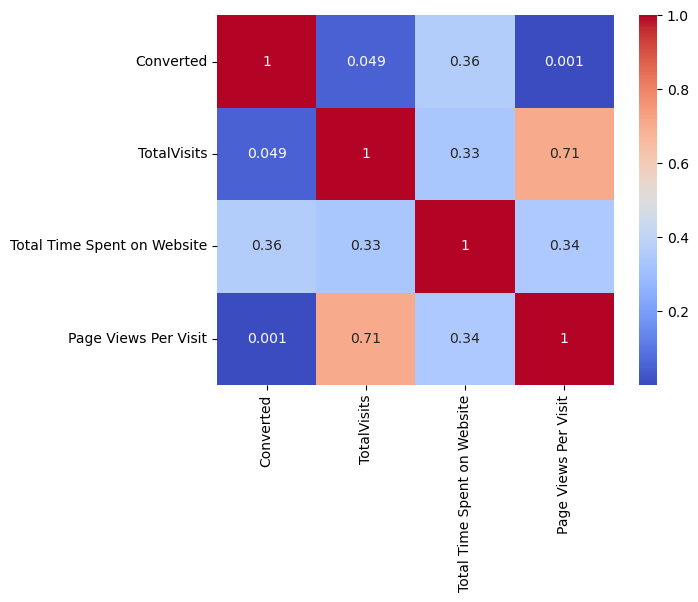

In [67]:
# Correlation Heatmap
sns.heatmap(leads.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [69]:
# Step: Dummy Variable Creation
dummies = pd.get_dummies(leads[cat_cols], drop_first=True, dtype=int)
leads = pd.concat([leads.drop(cat_cols, axis=1), dummies], axis=1)

In [73]:
# Step: Test-Train Split
X = leads.drop('Converted', axis=1)
y = leads['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [75]:
# Step: Feature Scaling
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [143]:
# Step: Model Building with RFE
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=20)  
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [155]:
# Supported columns
supported_cols = X_train.columns[rfe.support_]


In [157]:
print("RFE Selected Columns:", supported_cols)

RFE Selected Columns: Index(['Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent',
       'What is your current occupation_Not Specified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')


In [159]:
# Initial model with statsmodels
X_train_sm = sm.add_constant(X_train[supported_cols])
model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1198.7
Date:                Sun, 17 Aug 2025   Deviance:                       2397.5
Time:                        18:06:37   Pearson chi2:                 1.12e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6129
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [161]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = supported_cols
vif['VIF'] = [variance_inflation_factor(X_train[supported_cols].values, i) for i in range(len(supported_cols))]
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)


                                         Features       VIF
8                              Tags_Not Specified  4.976262
3   What is your current occupation_Not Specified  4.665832
2                          Last Activity_SMS Sent  1.654808
17                 Last Notable Activity_Modified  1.526103
11       Tags_Will revert after reading the email  1.362874
1                                Do Not Email_Yes  1.222067
0                    Lead Source_Welingak Website  1.123795
10                                   Tags_Ringing  1.120549
19             Last Notable Activity_Unsubscribed  1.081823
5                         Tags_Closed by Horizzon  1.055159
7                               Tags_Lost to EINS  1.054267
9                Tags_Not doing further education  1.050439
18  Last Notable Activity_Olark Chat Conversation  1.043108
4                                       Tags_Busy  1.042695
15                              Tags_switched off  1.040877
16                        Tags_wrong num

In [163]:
final_features = [
    'Tags_Not Specified',
    'What is your current occupation_Not Specified',
    'Last Activity_SMS Sent',
    'Tags_Will revert after reading the email',
    'Lead Source_Welingak Website',
    'Tags_Busy',
    'Tags_Lost to EINS',
    'Tags_switched off',
    'Tags_Closed by Horizzon'
]

In [165]:

X_train_sm = sm.add_constant(X_train[final_features])
final_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(final_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1332.8
Date:                Sun, 17 Aug 2025   Deviance:                       2665.6
Time:                        18:06:46   Pearson chi2:                 8.16e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5962
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [167]:
# Final VIF
vif_final = pd.DataFrame()
vif_final['Features'] = final_features
vif_final['VIF'] = [variance_inflation_factor(X_train[final_features].values, i) for i in range(len(final_features))]
vif_final = vif_final.sort_values(by='VIF', ascending=False)
print(vif_final)

                                        Features       VIF
0                             Tags_Not Specified  4.836214
1  What is your current occupation_Not Specified  4.548859
2                         Last Activity_SMS Sent  1.488973
3       Tags_Will revert after reading the email  1.297934
4                   Lead Source_Welingak Website  1.123270
5                                      Tags_Busy  1.033440
6                              Tags_Lost to EINS  1.030584
7                              Tags_switched off  1.024242
8                        Tags_Closed by Horizzon  1.008834


In [169]:
# Step: Model Evaluation on Train
y_train_pred = final_model.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Actual': y_train, 'Prob': y_train_pred})
y_train_pred_final['Predicted'] = y_train_pred_final['Prob'].map(lambda x: 1 if x > 0.5 else 0)

In [171]:
# Train Metrics
print(confusion_matrix(y_train_pred_final['Actual'], y_train_pred_final['Predicted']))
print("Train Accuracy:", accuracy_score(y_train_pred_final['Actual'], y_train_pred_final['Predicted']))
print("Train Precision:", precision_score(y_train_pred_final['Actual'], y_train_pred_final['Predicted']))
print("Train Recall:", recall_score(y_train_pred_final['Actual'], y_train_pred_final['Predicted']))

[[3719  228]
 [ 304 2100]]
Train Accuracy: 0.9162336639899229
Train Precision: 0.9020618556701031
Train Recall: 0.8735440931780366


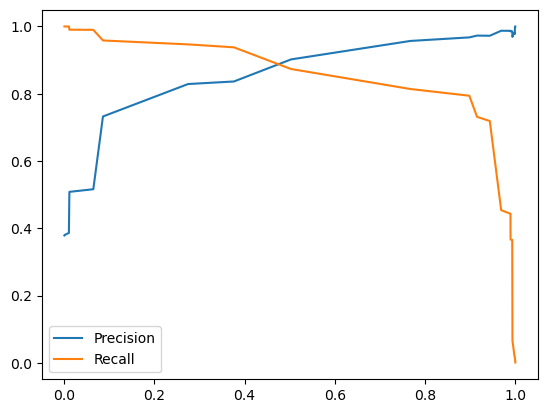

In [173]:
# Optimal Cutoff using Precision-Recall
p, r, t = precision_recall_curve(y_train_pred_final['Actual'], y_train_pred_final['Prob'])
plt.plot(t, p[:-1], label='Precision')
plt.plot(t, r[:-1], label='Recall')
plt.legend()
plt.show()

In [175]:
# Choose cutoff ~0.3 for high recall (~80% target)
cutoff = 0.5
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Prob'].map(lambda x: 1 if x > cutoff else 0)


In [177]:
# Updated Train Metrics
print("Train Accuracy at 0.3:", accuracy_score(y_train_pred_final['Actual'], y_train_pred_final['Final_Predicted']))
print("Train Precision at 0.3:", precision_score(y_train_pred_final['Actual'], y_train_pred_final['Final_Predicted']))
print("Train Recall at 0.3:", recall_score(y_train_pred_final['Actual'], y_train_pred_final['Final_Predicted']))


Train Accuracy at 0.3: 0.9162336639899229
Train Precision at 0.3: 0.9020618556701031
Train Recall at 0.3: 0.8735440931780366


In [179]:
# Test Evaluation
X_test_sm = sm.add_constant(X_test[final_features])
y_test_pred = final_model.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Actual': y_test, 'Prob': y_test_pred})
y_test_pred_final['Predicted'] = y_test_pred_final['Prob'].map(lambda x: 1 if x > cutoff else 0)

In [181]:
# Test Metrics
print("Test Accuracy:", accuracy_score(y_test_pred_final['Actual'], y_test_pred_final['Predicted']))
print("Test Precision:", precision_score(y_test_pred_final['Actual'], y_test_pred_final['Predicted']))
print("Test Recall:", recall_score(y_test_pred_final['Actual'], y_test_pred_final['Predicted']))
print("Test ROC AUC:", roc_auc_score(y_test_pred_final['Actual'], y_test_pred_final['Prob']))

Test Accuracy: 0.9118619170033052
Test Precision: 0.8966900702106319
Test Recall: 0.8671193016488846
Test ROC AUC: 0.9632193949733212


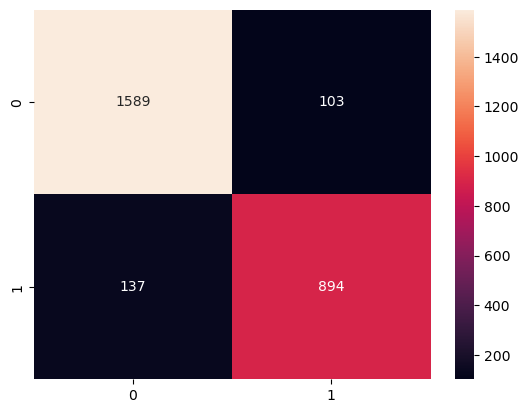

In [183]:

# Confusion Matrix on Test
sns.heatmap(confusion_matrix(y_test_pred_final['Actual'], y_test_pred_final['Predicted']), annot=True, fmt='d')
plt.show()


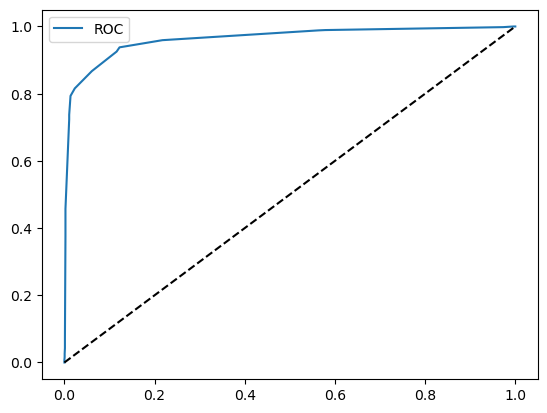

In [185]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_pred_final['Actual'], y_test_pred_final['Prob'])
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

In [187]:
# Lead Scoring on Full Data
X_full_sm = sm.add_constant(X[final_features])
full_pred = final_model.predict(X_full_sm)
leads['Lead Score'] = round(full_pred * 100).astype(int)
print(leads[['Converted', 'Lead Score']].head())

   Converted  Lead Score
0          0           1
1          0           1
2          1          94
3          0           1
4          1          94


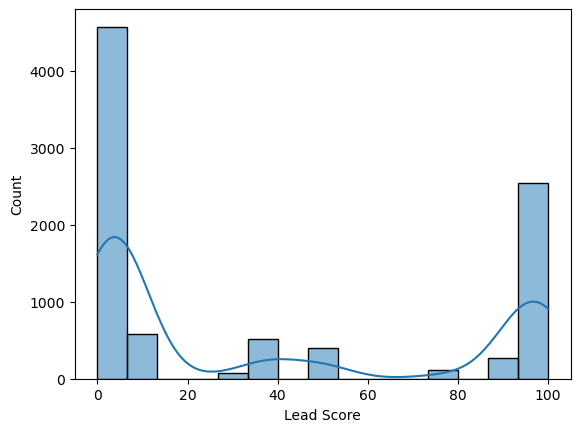

In [189]:
# Distribution of Lead Scores
sns.histplot(leads['Lead Score'], kde=True)
plt.show()

In [191]:
# Answers to Questions
# 1. Top three variables contributing to conversion (by abs coefficient)
coeff = pd.Series(final_model.params[1:], index=final_features).abs().sort_values(ascending=False)
print("Top 3 Variables:")
print(coeff.head(3))

Top 3 Variables:
Tags_Lost to EINS                           9.585551
Tags_Closed by Horizzon                     9.052105
Tags_Will revert after reading the email    7.339918
dtype: float64


In [197]:
#Q2: Top 3 categorical/dummy variables
coeff = pd.Series(final_model.params[1:], index=final_features)  # Exclude intercept
dummy_coeff = coeff[coeff.index.str.contains('_')]  # Filter for dummy variables
top_3_dummy = dummy_coeff.abs().sort_values(ascending=False).head(3)

In [199]:
print(top_3_dummy)

Tags_Lost to EINS                           9.585551
Tags_Closed by Horizzon                     9.052105
Tags_Will revert after reading the email    7.339918
dtype: float64


In [201]:
# Q1: Top three variables (all types) contributing to conversion probability
coeff_all = pd.Series(final_model.params[1:], index=final_features).abs().sort_values(ascending=False)
top_3_all = coeff_all.head(3)
print(f"\nQ1: Top three variables contributing most towards lead conversion probability (at 06:13 PM IST, August 17, 2025):")
print(top_3_all)

# Q2: Top three categorical/dummy variables
coeff_dummy = coeff_all[coeff_all.index.str.contains('_')]  # Filter dummy variables
top_3_dummy = coeff_dummy.head(3)
print(f"\nQ2: Top 3 categorical/dummy variables to focus on to increase lead conversion probability:")
print(top_3_dummy)


Q1: Top three variables contributing most towards lead conversion probability (at 06:13 PM IST, August 17, 2025):
Tags_Lost to EINS                           9.585551
Tags_Closed by Horizzon                     9.052105
Tags_Will revert after reading the email    7.339918
dtype: float64

Q2: Top 3 categorical/dummy variables to focus on to increase lead conversion probability:
Tags_Lost to EINS                           9.585551
Tags_Closed by Horizzon                     9.052105
Tags_Will revert after reading the email    7.339918
dtype: float64
